In [ ]:
import torch

# Load the .pt file
file_path = '/work/van-speech-nlp/jindaznb/jslpnb/mllm_experiments/slam-llm/examples/asr_librispeech/plots/embeddings/psst_phoneme_wavlm_llama32_1b_linear_peft.pt'
data = torch.load(file_path)

# Inspect the keys in the loaded data
print("Keys in the loaded data:", data.keys())

# Access the 'speech_embeddings' tensor and get its shape
speech_embeddings = data['speech_embeddings']
print("Shape of 'speech_embeddings':", speech_embeddings.shape)

# Access the 'language_embeddings' tensor and get its shape
language_embeddings = data['language_embeddings']
print("Shape of 'language_embeddings':", language_embeddings.shape)


: 

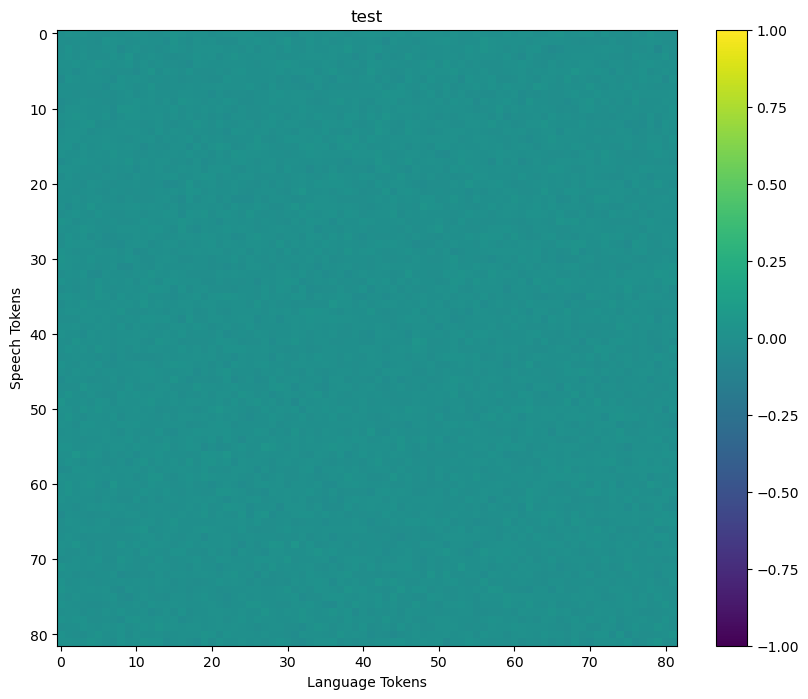

Cosine similarity shape: (82, 82)


In [3]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt
from math import gcd

def calculate_lcm(a, b):
    """Calculate the Least Common Multiple (LCM) of two numbers."""
    return abs(a * b) // gcd(a, b)

def repeat_embeddings(embeddings, target_dim):
    """Repeat each element in the embeddings along the last dimension to match the target dimension."""
    original_dim = embeddings.shape[-1]
    repeat_factor = target_dim // original_dim
    # Repeat each element repeat_factor times
    return embeddings.repeat_interleave(repeat_factor, dim=-1)

def plot_cosine_similarity_matrix(speech_emb, lang_emb, title="test"):
    # Convert torch tensors to numpy if needed
    if torch.is_tensor(speech_emb):
        speech_emb = speech_emb.numpy()
    if torch.is_tensor(lang_emb):
        lang_emb = lang_emb.numpy()
    
    # Get embedding dimensions
    speech_dim = speech_emb.shape[-1]
    lang_dim = lang_emb.shape[-1]
    
    # Calculate LCM of the dimensions
    target_dim = calculate_lcm(speech_dim, lang_dim)
    
    # Repeat embeddings to match the LCM dimension
    speech_emb_expanded = repeat_embeddings(torch.tensor(speech_emb), target_dim).numpy()
    lang_emb_expanded = repeat_embeddings(torch.tensor(lang_emb), target_dim).numpy()
    
    # Normalize embeddings
    speech_norm = speech_emb_expanded / np.linalg.norm(speech_emb_expanded, axis=1, keepdims=True)
    lang_norm = lang_emb_expanded / np.linalg.norm(lang_emb_expanded, axis=1, keepdims=True)
    
    # Calculate cosine similarity matrix
    similarity_matrix = np.dot(speech_norm, lang_norm.T)
    
    # Plot heatmap
    plt.figure(figsize=(10, 8))
    plt.imshow(similarity_matrix, cmap='viridis', aspect='auto', vmin=-1, vmax=1)
    plt.colorbar()
    plt.xlabel('Language Tokens')
    plt.ylabel('Speech Tokens')
    plt.title(title)
    plt.show()
    
    return similarity_matrix

def process_embedding(file_path):
    if file_path.endswith('.pt'):
        # Load data
        data = torch.load(file_path)
        speech_emb = data['speech_embeddings']
        lang_emb = data['language_embeddings']
        
        # Handle multiple samples (batch)
        batch_size = speech_emb.shape[0]
        
        similarities = []
        # Loop over each sample and plot
        for i in range(batch_size):
            speech_sample = speech_emb[i]  # Shape: [n_speech_tokens, embedding_dim]
            lang_sample = lang_emb[i]      # Shape: [n_lang_tokens, embedding_dim]
            print(f"Speech Embedding Shape: {speech_sample.shape}")
            print(f"Language Embedding Shape: {lang_sample.shape}")
            
            # Plot similarity matrix
            similarity_matrix = plot_cosine_similarity_matrix(
                speech_sample, 
                lang_sample, 
                f"Pairwise Token Similarity - Sample {i+1} - {os.path.basename(file_path)}"
            )
            similarities.append(similarity_matrix)
            plt.show()
            
        return similarities
    else:
        print(f"{file_path} is not a valid .pt file.")
        return None


# Example usage
speech_emb = torch.randn(82, 5120)  # Shape: (n_speech_tokens, embedding_dim)
lang_emb = torch.randn(82, 2048)    # Shape: (n_lang_tokens, embedding_dim)

similarity_matrix = plot_cosine_similarity_matrix(speech_emb, lang_emb)
print(f"Cosine similarity shape: {similarity_matrix.shape}")  # Expected shape: (82, 82)


In [4]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from math import gcd

def calculate_lcm(a, b):
    """Calculate the Least Common Multiple (LCM) of two numbers."""
    return abs(a * b) // gcd(a, b)

def repeat_embeddings(embeddings, target_dim):
    """Repeat each element in the embeddings along the last dimension to match the target dimension."""
    original_dim = embeddings.shape[-1]
    repeat_factor = target_dim // original_dim
    # Repeat each element repeat_factor times
    return embeddings.repeat_interleave(repeat_factor, dim=-1)

def plot_cosine_similarity_matrix(speech_emb, lang_emb, title="test"):
    # Convert torch tensors to numpy if needed
    if torch.is_tensor(speech_emb):
        speech_emb = speech_emb.numpy()
    if torch.is_tensor(lang_emb):
        lang_emb = lang_emb.numpy()
    
    # Get embedding dimensions
    speech_dim = speech_emb.shape[-1]
    lang_dim = lang_emb.shape[-1]
    
    # Calculate LCM of the dimensions
    target_dim = calculate_lcm(speech_dim, lang_dim)
    
    # Repeat embeddings to match the LCM dimension
    speech_emb_expanded = repeat_embeddings(torch.tensor(speech_emb), target_dim).numpy()
    lang_emb_expanded = repeat_embeddings(torch.tensor(lang_emb), target_dim).numpy()
    
    # Normalize embeddings
    speech_norm = speech_emb_expanded / np.linalg.norm(speech_emb_expanded, axis=1, keepdims=True)
    lang_norm = lang_emb_expanded / np.linalg.norm(lang_emb_expanded, axis=1, keepdims=True)
    
    # Calculate cosine similarity matrix
    similarity_matrix = np.dot(speech_norm, lang_norm.T)
    
    # Plot heatmap
    plt.figure(figsize=(10, 8))
    plt.imshow(similarity_matrix, cmap='viridis', aspect='auto', vmin=-1, vmax=1)
    plt.colorbar()
    plt.xlabel('Language Tokens')
    plt.ylabel('Speech Tokens')
    plt.title(title)
    plt.show()
    
    return similarity_matrix

def process_embedding(file_path):
    if file_path.endswith('.pt'):
        # Load data
        data = torch.load(file_path)
        speech_emb = data['speech_embeddings']
        lang_emb = data['language_embeddings']
        
        # Handle multiple samples (batch)
        batch_size = speech_emb.shape[0]
        
        similarities = []
        # Loop over each sample and plot
        for i in range(batch_size):
            speech_sample = speech_emb[i]  # Shape: [n_speech_tokens, embedding_dim]
            lang_sample = lang_emb[i]      # Shape: [n_lang_tokens, embedding_dim]
            # print(f"Speech Embedding Shape: {speech_sample.shape}")
            # print(f"Language Embedding Shape: {lang_sample.shape}")
            
            # Plot similarity matrix
            similarity_matrix = plot_cosine_similarity_matrix(
                speech_sample, 
                lang_sample, 
                f"Pairwise Token Similarity - Sample {i+1} - {os.path.basename(file_path)}"
            )
            similarities.append(similarity_matrix)
            plt.show()
            
        return similarities
    else:
        print(f"{file_path} is not a valid .pt file.")
        return None

def process_embedding(file_path):
    if file_path.endswith('.pt'):
        # Load data
        data = torch.load(file_path)
        speech_emb = data['speech_embeddings']
        lang_emb = data['language_embeddings']
        
        # Handle multiple samples (batch)
        batch_size = speech_emb.shape[0]
        
        similarities = []
        # Loop over each sample and plot
        for i in range(batch_size):
            speech_sample = speech_emb[i]  # Shape: [n_speech_tokens, embedding_dim]
            lang_sample = lang_emb[i]      # Shape: [n_lang_tokens, embedding_dim]
            print(f"Speech Embedding Shape: {speech_sample.shape}")
            print(f"Language Embedding Shape: {lang_sample.shape}")
            
            # Plot similarity matrix
            similarity_matrix = plot_cosine_similarity_matrix(
                speech_sample, 
                lang_sample, 
                f"Pairwise Token Similarity - Sample {i+1} - {os.path.basename(file_path)}"
            )
            similarities.append(similarity_matrix)
            plt.show()
            
        return similarities
    else:
        print(f"{file_path} is not a valid .pt file.")
        return None

import os
import jsonlines

def process_all_embeddings_in_folder(folder_path):
    all_similarities = {}
    all_targets = []  # Initialize a list to store targets
    
    for filename in os.listdir(folder_path):
        if filename.endswith('.pt'):
            file_path = os.path.join(folder_path, filename)
            # print(f"Processing file: {filename}")
            
            # Extract the dataset name (text before the first underscore)
            dataset_name = filename.split('_')[0]
            goal_file = f"/work/van-speech-nlp/jindaznb/jslpnb/mllm_experiments/slam-llm/data/{dataset_name}/test_small.jsonl"
            
            # Read the JSONL file
            with jsonlines.open(goal_file) as reader:
                for obj in reader:
                    # Extract the target field
                    target = obj.get('target', None)
                    if target:
                        all_targets.append(target)  # Append the target to the list
            
            similarities = process_embedding(file_path)
            if similarities is not None:
                all_similarities[filename] = similarities
    
    return all_similarities, all_targets

Speech Embedding Shape: torch.Size([36, 5120])
Language Embedding Shape: torch.Size([36, 2048])


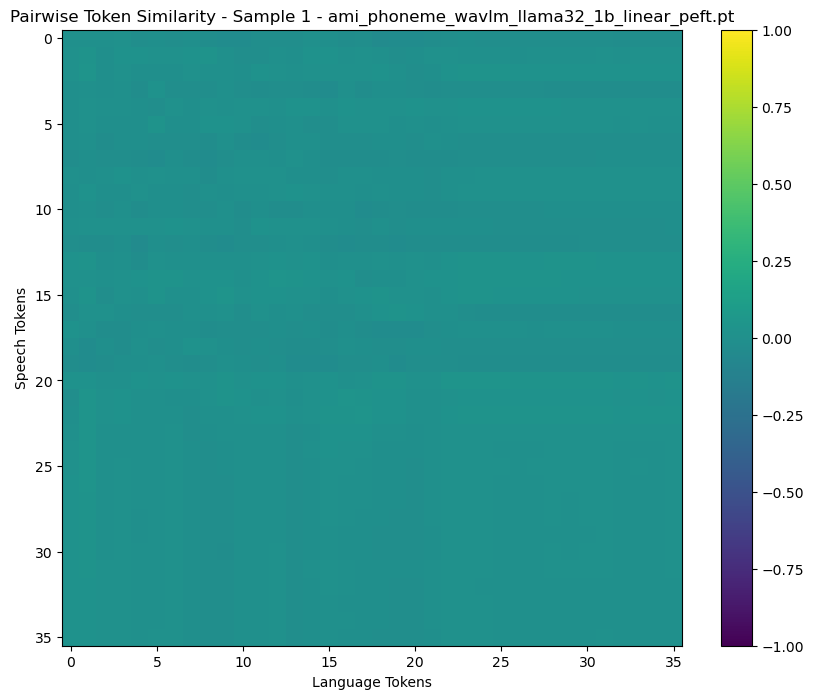

Speech Embedding Shape: torch.Size([36, 5120])
Language Embedding Shape: torch.Size([36, 2048])


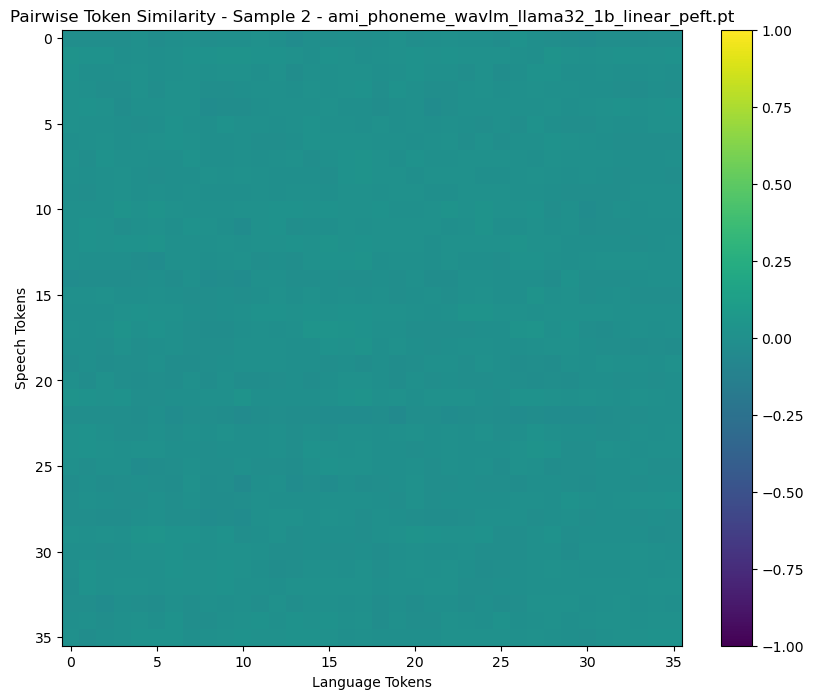

Speech Embedding Shape: torch.Size([20, 5120])
Language Embedding Shape: torch.Size([20, 2048])


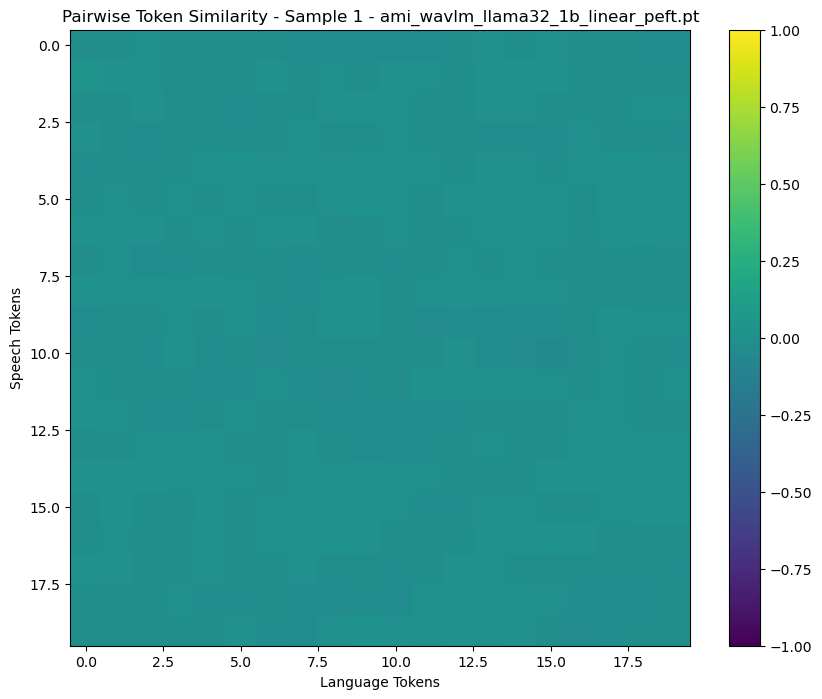

Speech Embedding Shape: torch.Size([35, 5120])
Language Embedding Shape: torch.Size([35, 2048])


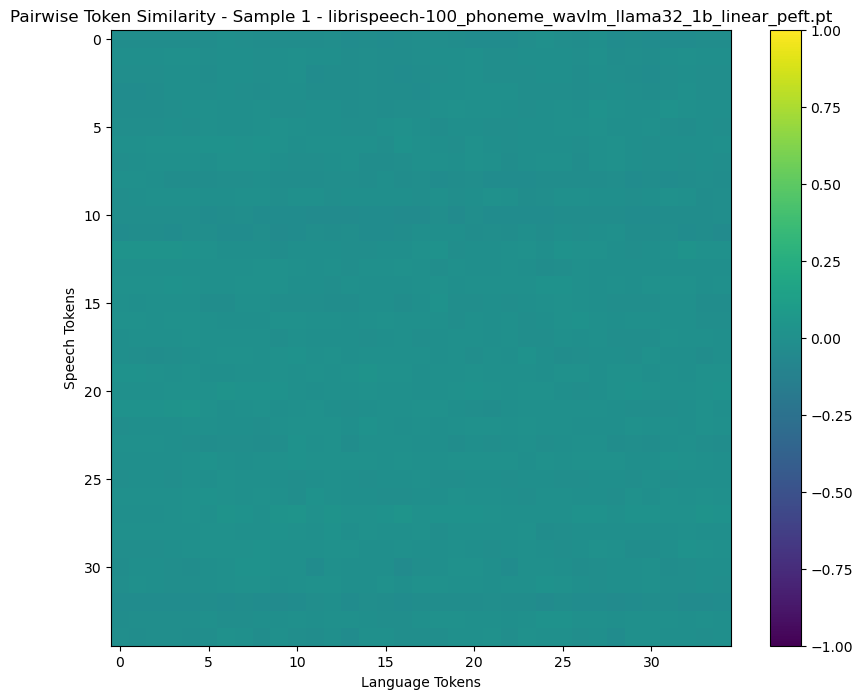

Speech Embedding Shape: torch.Size([162, 5120])
Language Embedding Shape: torch.Size([162, 2048])


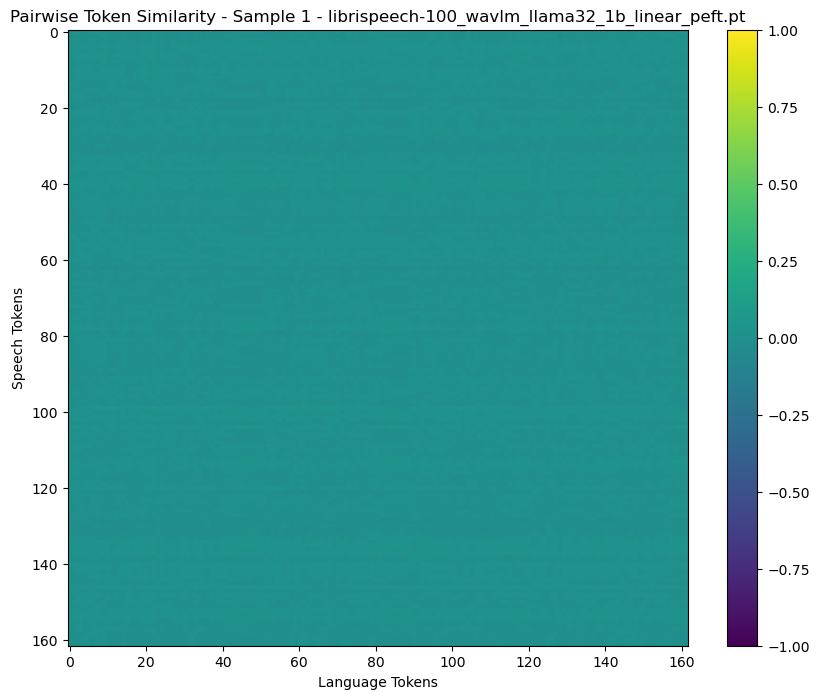

Speech Embedding Shape: torch.Size([19, 5120])
Language Embedding Shape: torch.Size([19, 2048])


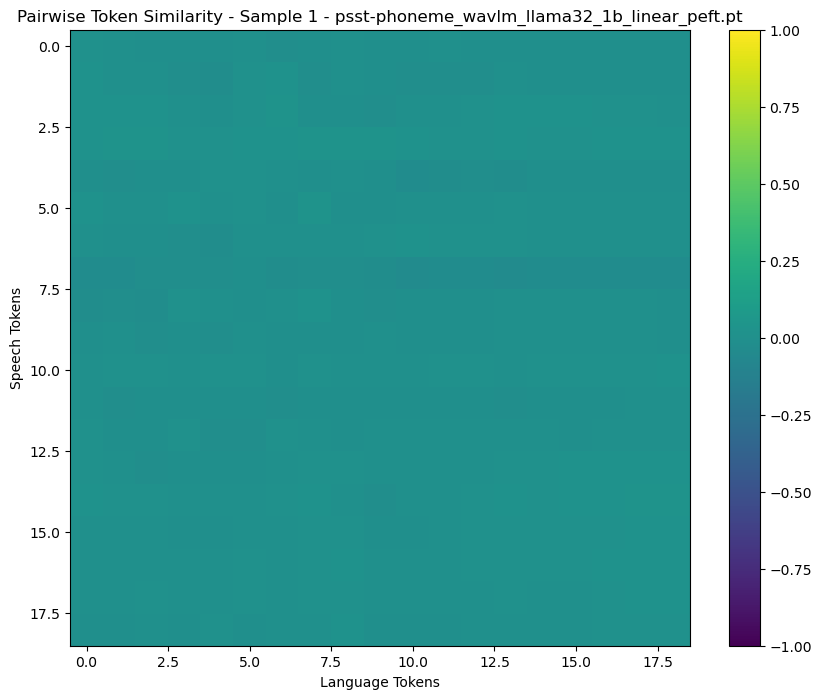

({'ami_phoneme_wavlm_llama32_1b_linear_peft.pt': [array([[ 0.00143167,  0.00412101,  0.00240591, ..., -0.01286606,
           -0.01424162, -0.00933031],
          [ 0.01073316,  0.02944117, -0.00012915, ...,  0.00918505,
            0.00839221,  0.01196595],
          [ 0.01472453,  0.03341887, -0.00615664, ...,  0.01965988,
            0.01807481,  0.02291419],
          ...,
          [ 0.01815544,  0.02145462,  0.00943548, ...,  0.00438627,
            0.00303883,  0.00577503],
          [ 0.01703936,  0.02131434,  0.01060359, ...,  0.00452423,
            0.00345522,  0.00562525],
          [ 0.01940863,  0.02332868,  0.00832196, ...,  0.00564176,
            0.00422135,  0.00723468]], dtype=float32),
   array([[-0.01315111, -0.00927041, -0.0089133 , ..., -0.01845642,
           -0.01220887, -0.01112374],
          [ 0.02874938,  0.01584628,  0.01983368, ...,  0.01239734,
            0.0100859 ,  0.02330898],
          [ 0.01747539, -0.00090822, -0.00537597, ..., -0.00576063,
     

In [6]:
# Example folder path
folder_path = '/work/van-speech-nlp/jindaznb/jslpnb/mllm_experiments/slam-llm/examples/asr_librispeech/plots/embeddings'
process_all_embeddings_in_folder(folder_path)